# Classification exercise (강재영)

### -- 심리 성향 예측 --
#### https://www.dacon.io/competitions/official/235647/data 데이터 사용

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("C:\\Users\\tom11\\psy\\train.csv")
test = pd.read_csv("C:\\Users\\tom11\\psy\\test_x.csv")
submission = pd.read_csv("C:\\Users\\tom11\\psy\\sample_submission.csv")

### - 데이터 변수 설명 출처: https://www.dacon.io/competitions/official/235647/talkboard/401534?page=1&dtype=recent&ptype=pub
### Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리
#### Qa : Secret
#### Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
#### Qc : Anyone who completely trusts anyone else is asking for trouble.
#### Qd : Secret
#### Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.
#### Qf : There is no excuse for lying to someone else.
#### Qg : Secret
#### Qh : Most people forget more easily the death of their parents than the loss of their property.
#### Qi : Secret
#### Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.
#### Qk : All in all, it is better to be humble and honest than to be important and dishonest.
#### Ql : Secret
#### Qm : It is hard to get ahead without cutting corners here and there.
#### Qn : Secret
#### Qo : The best way to handle people is to tell them what they want to hear.
#### Qp : Secret
#### Qq : Most people are basically good and kind.
#### Qr : One should take action only when sure it is morally right.
#### Qs : It is wise to flatter important people.
#### Qt : Secret


#### 					1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.



### Q_E(a~t) : 질문을 답할 때까지의 시간


### age_group : 연령


### education : 교육 수준
####       1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답


### engnat : 영어권
#### 1=Yes, 2=No, 0=무응답


### familysize : 형제자매 수


### gender : 성별
#### Male, Female


### hand : 필기하는 손
#### 1=Right, 2=Left, 3=Both, 0=무응답


### married : 혼인 여부
#### 1=Never married, 2=Currently married, 3=Previously married, 0=Other


### race : 인종
#### Asian, Arab, Black, Indigenous Australian, Native American, White, Other


### religion : 종교
#### Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


### tp__(01~07) : items were rated "I see myself as:" _____ such that
#### tp01 : Extraverted, enthusiastic.
#### tp02 : Critical, quarrelsome.
#### tp03 : Dependable, self-disciplined.
#### tp04 : Anxious, easily upset.
#### tp05 : Open to new experiences, complex.
#### tp06 : Reserved, quiet.
#### tp07 : Sympathetic, warm.
#### tp08 : Disorganized, careless.
#### tp09 : Calm, emotionally stable.
#### tp10 : Conventional, uncreative.
								

## 								순서형 변수

							



### urban : 유년기의 거주 구역
#### 1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답




### wr_(01~13) : 실존하는 해당 단어의 정의을 앎
#### 1=Yes, 0=No
### wf_(01~03) : 허구인 단어의 정의를 앎
#### 1=Yes, 0=No


### voted (타겟): 지난 해 국가 선거 투표 여부
#### 1=Yes, 2=No

In [3]:
#데이터 셋 정보 확인
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [5]:
train.describe()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,...,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,22765.500000,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,...,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,13144.100565,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,...,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,0.000000,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11382.750000,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,22765.500000,2.000000,5.570000e+02,3.000000,1.218000e+03,4.000000,899.000000,1.000000,9.310000e+02,2.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,34148.250000,3.000000,8.270000e+02,4.000000,1.838000e+03,5.000000,1335.000000,2.000000,1.355000e+03,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,45531.000000,5.000000,2.413960e+06,5.000000,5.580395e+06,5.000000,871557.000000,5.000000,1.552821e+06,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [7]:
# voted(타겟)이 1과 2로 이루어져있기 때문에 0과 1로 변경
train['voted'].replace(2, 0, inplace=True)
train['voted'].head()

0    0
1    0
2    1
3    1
4    1
Name: voted, dtype: int64

In [8]:
#결측치 개수 확인
train.isna().sum()

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

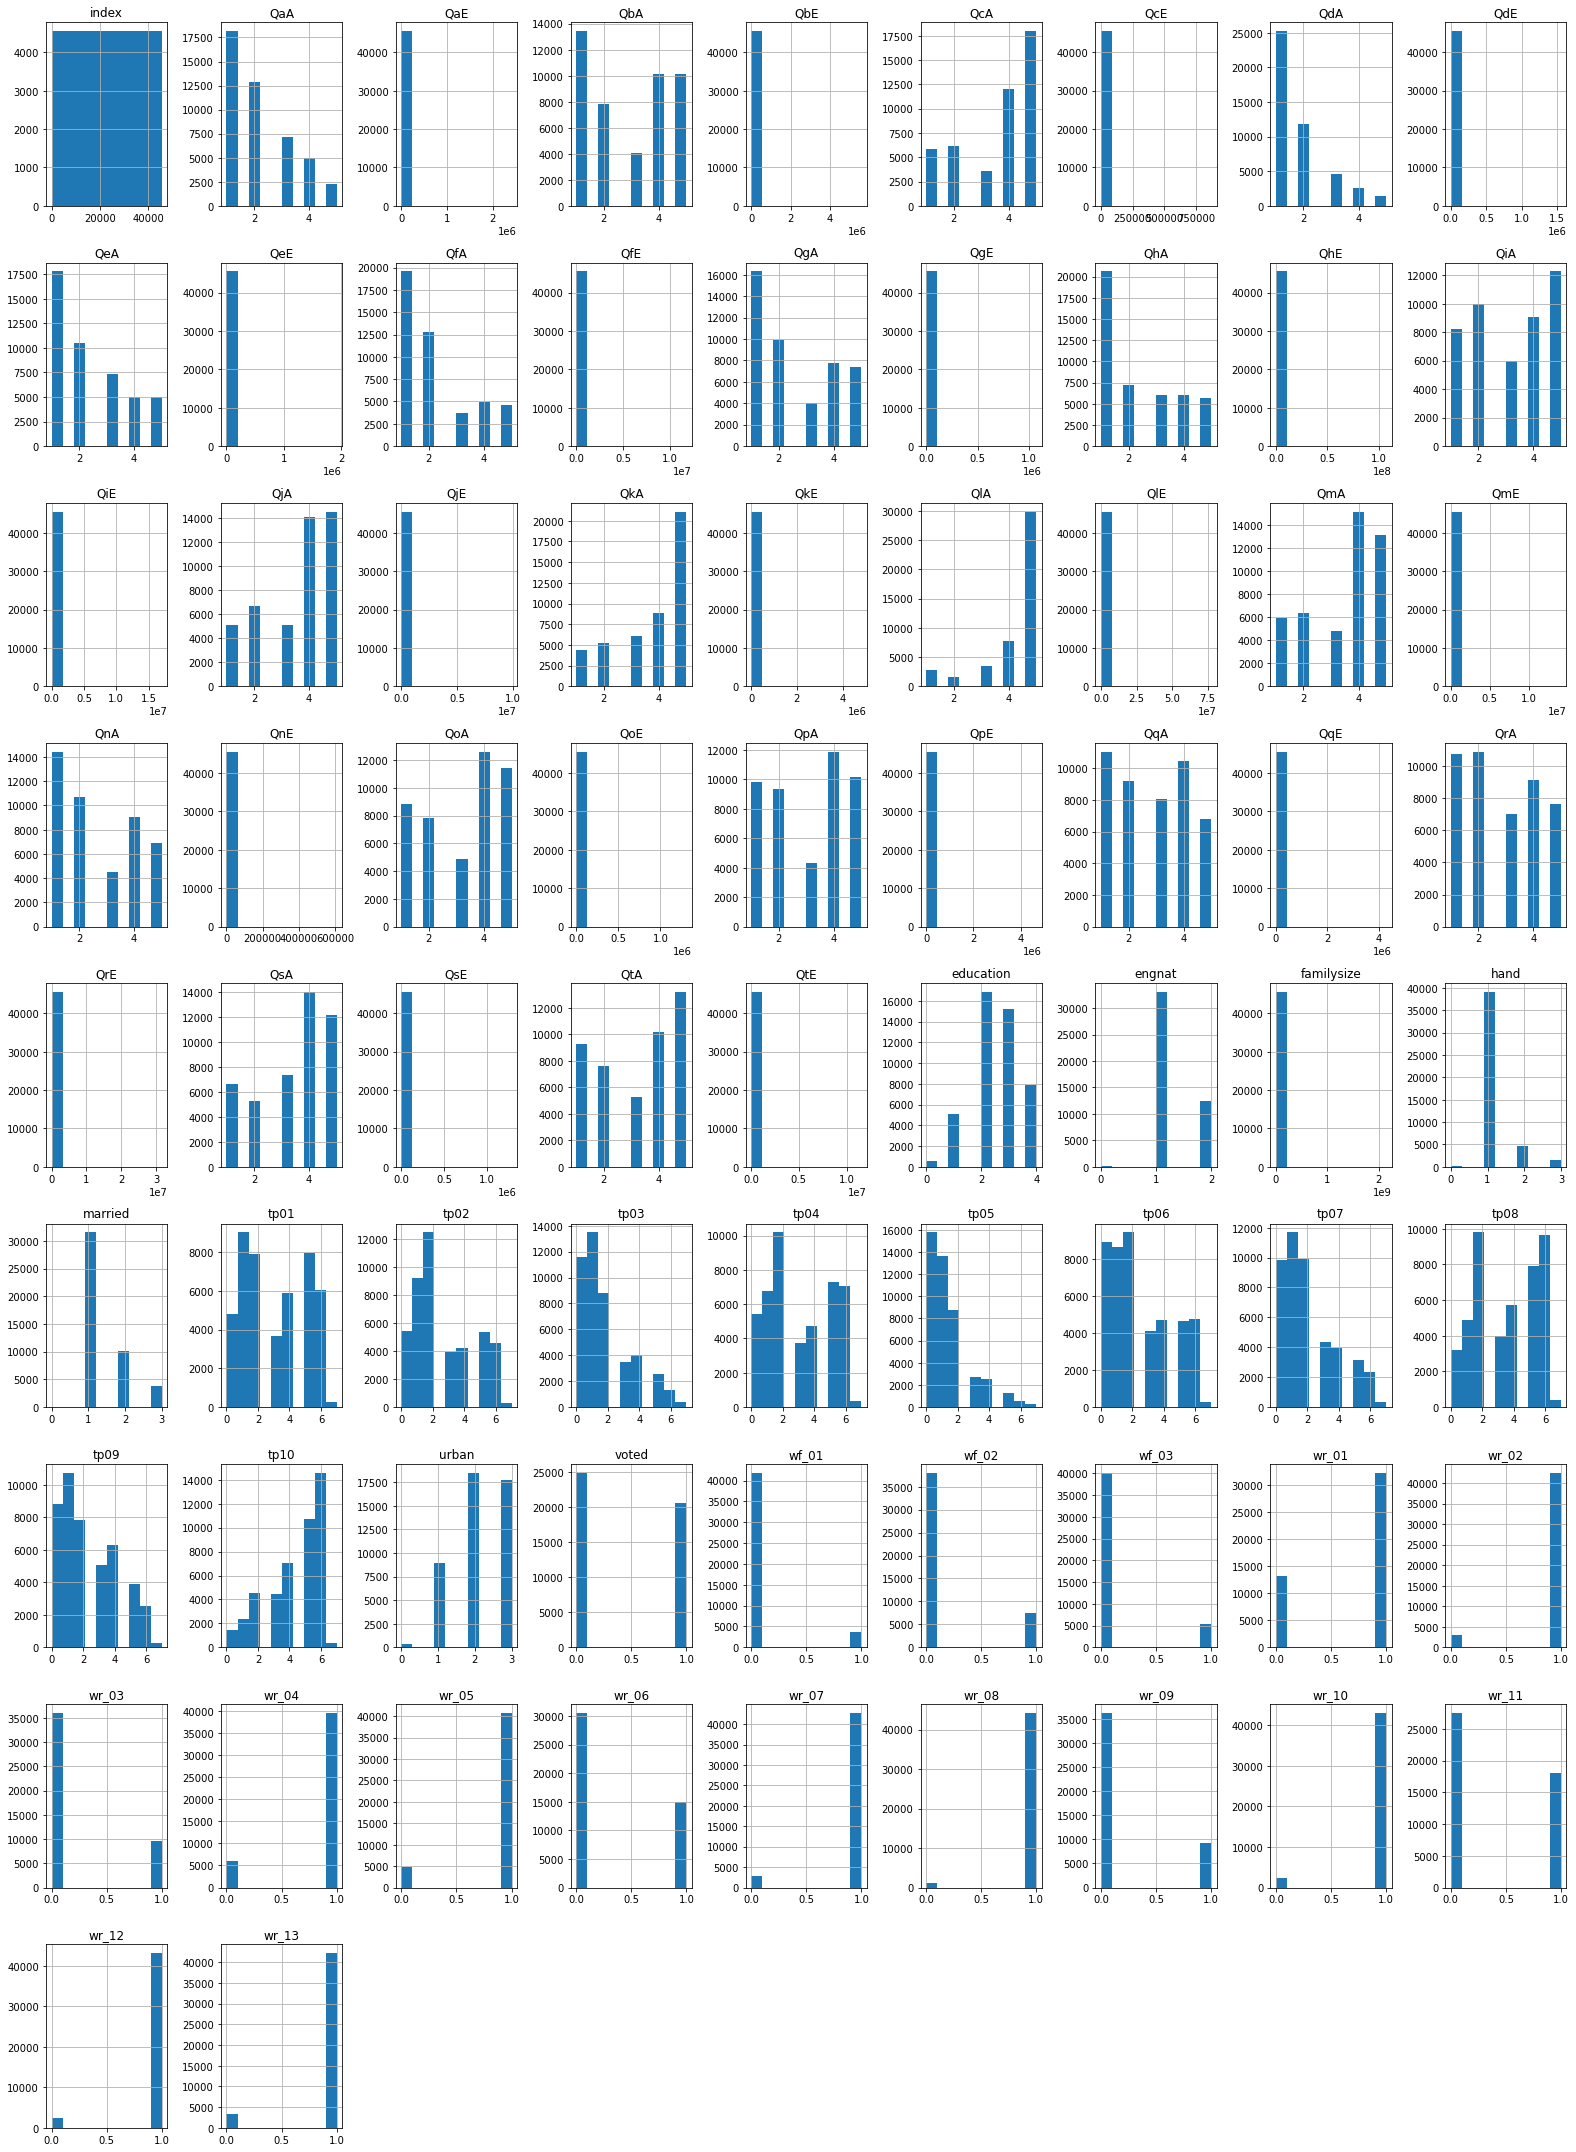

In [9]:
#히스토그램 표현
train.hist(figsize=(22,30))
plt.tight_layout()

<AxesSubplot:title={'center':'Target Rate'}, ylabel='voted'>

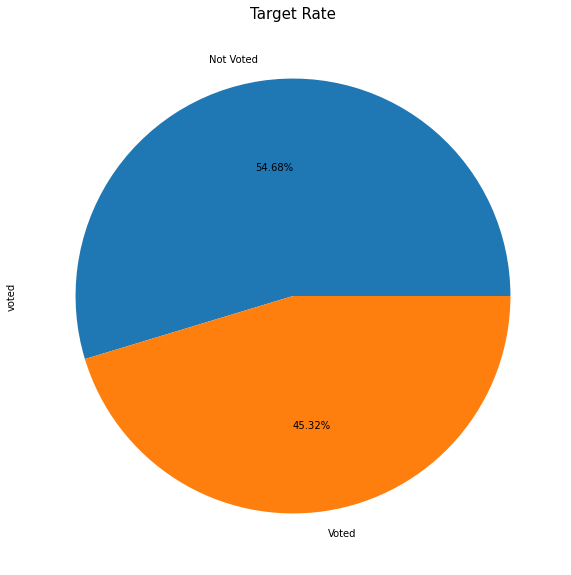

In [10]:
#타겟에 대한 비율을 파이 차트로 표현
plt.figure(figsize=(10,10))
plt.title('Target Rate', fontsize=15)
train['voted'].value_counts().plot.pie(autopct='%1.2f%%',
                                            labels=['Not Voted', 'Voted'])

In [11]:
y_train = train['voted']
X_train = train.drop(columns='voted')
X_test = test.copy()
print(X_train.shape, y_train.shape, X_test.shape, submission.shape)

(45532, 77) (45532,) (11383, 77) (11383, 2)


In [13]:
train['age_group'].value_counts()

10s     14215
20s     14112
30s      7836
40s      5051
50s      2889
60s      1194
+70s      235
Name: age_group, dtype: int64

Text(0.5, 0, 'age group')

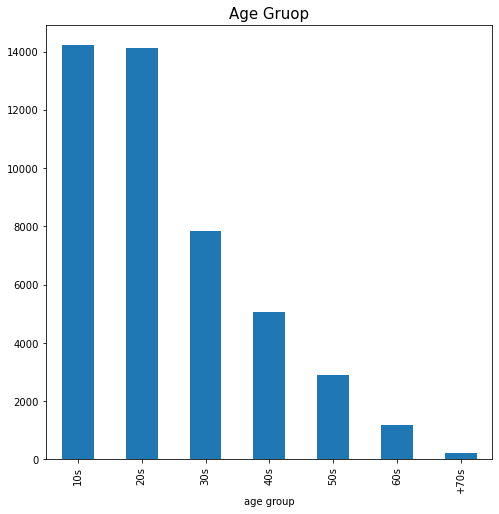

In [16]:
#연령 그룹에 대한 분포를 바 차트로 표현
plt.figure(figsize=(8,8))
plt.title('Age Gruop', fontsize=15)
train["age_group"].value_counts().plot.bar()
plt.xlabel('age group')

In [17]:
train['education'].value_counts()

2    16835
3    15227
4     7854
1     5088
0      528
Name: education, dtype: int64

<AxesSubplot:title={'center':'Education'}>

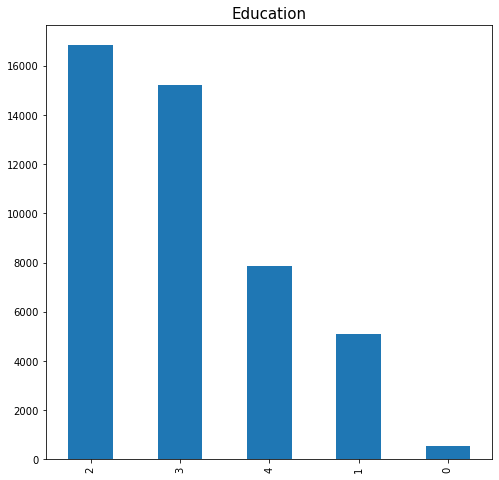

In [21]:
#교육 수준에 대한 분포를 바 차트로 표현
plt.figure(figsize=(8,8))
plt.title('Education', fontsize=15)
train["education"].value_counts().plot.bar()

In [22]:
y_train = train['voted']
X_train = train.drop(columns='voted')
X_test = test.copy()
print(X_train.shape, y_train.shape, X_test.shape, submission.shape)

(45532, 77) (45532,) (11383, 77) (11383, 2)


In [24]:
from sklearn.preprocessing import LabelEncoder
all_data = pd.get_dummies(all_data, columns=['race','religion','married','hand','gender','engnat','age_group'])
le = LabelEncoder()
for col in ['education','urban']:
    all_data[col] = le.fit_transform(all_data[col])

In [25]:
all_data.columns[all_data.dtypes == "object"]

Index([], dtype='object')

In [28]:
X_train = all_data[:len(y_train)]
X_test = all_data[len(y_train):]

print(X_train.shape, y_train.shape, X_test.shape)

(45532, 109) (45532,) (11383, 109)


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_m1 = y_train - 1

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, train["voted"], test_size=0.3, random_state= 42, stratify=train["voted"])

In [39]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

cat_model = CatBoostClassifier(learning_rate=0.05, iterations=12000, eval_metric='AUC', allow_writing_files=False,
                          od_type='Iter', random_state=55)

cat_model.fit(X_train, y_train, verbose=500)

y_pred_cat = cat_model.predict(X_val)

print('roc_auc:{:0.4f}'.format(roc_auc_score(y_val, y_pred_cat)))

0:	total: 25.8ms	remaining: 5m 9s
500:	total: 5.89s	remaining: 2m 15s
1000:	total: 14s	remaining: 2m 33s
1500:	total: 21.1s	remaining: 2m 27s
2000:	total: 28.2s	remaining: 2m 21s
2500:	total: 36.4s	remaining: 2m 18s
3000:	total: 43.2s	remaining: 2m 9s
3500:	total: 50.2s	remaining: 2m 1s
4000:	total: 57.1s	remaining: 1m 54s
4500:	total: 1m 4s	remaining: 1m 46s
5000:	total: 1m 11s	remaining: 1m 40s
5500:	total: 1m 19s	remaining: 1m 34s
6000:	total: 1m 29s	remaining: 1m 28s
6500:	total: 1m 38s	remaining: 1m 23s
7000:	total: 1m 48s	remaining: 1m 17s
7500:	total: 1m 55s	remaining: 1m 9s
8000:	total: 2m 3s	remaining: 1m 1s
8500:	total: 2m 10s	remaining: 53.8s
9000:	total: 2m 18s	remaining: 46.1s
9500:	total: 2m 26s	remaining: 38.6s
10000:	total: 2m 34s	remaining: 30.8s
10500:	total: 2m 41s	remaining: 23s
11000:	total: 2m 48s	remaining: 15.3s
11500:	total: 2m 54s	remaining: 7.59s
11999:	total: 3m 1s	remaining: 0us
roc_auc:0.6776


In [61]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(gamma=0, max_depth=22, min_child_weight=1)
XGB_model.fit(X_train, y_train)
y_pred_xgb = XGB_model.predict(X_val)
print('roc_auc:{:0.4f}'.format(roc_auc_score(y_val, y_pred_xgb)))

[18:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
roc_auc:0.6789


In [72]:
from lightgbm import LGBMClassifier
LGBM_model = LGBMClassifier(max_depth=20, min_child_samples=1)
LGBM_model.fit(X_train, y_train)
y_pred_lgbm = LGBM_model.predict(X_val)
print('roc_auc:{:0.4f}'.format(roc_auc_score(y_val, y_pred_lgbm)))

roc_auc:0.7000
